# An Introduction to Web Scraping

How you can use python to extract or scrape any type of content from web pages.

In this lecture we will learn how to extract simple text elements, images, and tables from different web pages, all with the help of a couple python packages:

* **requests**: http://docs.python-requests.org/en/latest/user/quickstart/
  * The requests package can crawl (load) webpages and download (scrape) their contents
* **Beautiful Soup**: http://www.crummy.com/software/BeautifulSoup/bs4/doc/
  * The Beautiful Soup package can transform scraped web content into an object that can be parsed and analyzed

Let's import them packages already, shall we?

In [48]:
import requests

# Beautiful Soup version 4.x
import bs4

### Making a request

In the context of the web, a `request` is the act of connecting to some web address and perform an action. There are many possible types of requests. The most common, and the one we will be using in this lecture, is the `GET` request which you are in fact quite familiar with already. A `GET` request is simple the act of downloading the content of the web address you are connection to: It's what you do everytime you browse the web!

Let's see how we can use python to "get" a webpage

In [27]:
response = requests.get("http://httpbin.org/html")

Methods from the `requests` package return `Response` objects

In [28]:
print(response)

<Response [200]>


One of the most important properties of the response is it's status code, which is printed by default but which we can also get explicitly

In [29]:
print(response.status_code)

200


The status code, indicates what happened to our request.
In this case we got a **200**, which means that all went well, and we successfully connected to the web address we wanted and downloaded its contents.

In [30]:
print(response.url)

http://httpbin.org/html


To get the web page's actual content, we access the Response.text variable, which contains the raw HTML source code of the page (more on this later) as one giant string.

In [34]:
print(response.text)

<!DOCTYPE html>
<html>
  <head>
  </head>
  <body>
      <h1>Herman Melville - Moby-Dick</h1>

      <div>
        <p>
          Availing himself of the mild, summer-cool weather that now reigned in these latitudes, and in preparation for the peculiarly active pursuits shortly to be anticipated, Perth, the begrimed, blistered old blacksmith, had not removed his portable forge to the hold again, after concluding his contributory work for Ahab's leg, but still retained it on deck, fast lashed to ringbolts by the foremast; being now almost incessantly invoked by the headsmen, and harpooneers, and bowsmen to do some little job for them; altering, or repairing, or new shaping their various weapons and boat furniture. Often he would be surrounded by an eager circle, all waiting to be served; holding boat-spades, pike-heads, harpoons, and lances, and jealously watching his every sooty movement, as he toiled. Nevertheless, this old man's was a patient hammer wielded by a patient arm. No murmur

The folks at http.org have quite the sense of humour...

Unfortunately thing don't always work out this nicely

In [38]:
requests.get("http://httpbin.org/totaly-fake-webpage")

<Response [404]>

Uops.
We got a **404** code which indicates that, **although the domain exists (the part before .org)**, the particular webpage you are trying to access does not.

Here are some of the most common status codes you might encounter:
* 200, **OK**. Request was successful
* 303, **See Other**. Page redirected to another URL. Your web browser automatically fetches the new URL but web crawlers do not usually do this unless you specify it.
* 401 **Unauthorized**. The URL requires authentication (e.g. password) which was not provided or was incorrect.
* 404, **Not Found**. The URL does not exist
* 500 **Internal Server Error**. The server is having _unexpected_ problems and the web page is down.
* 503 **Service Unavailable**. The web page is down, likely for server maintenance.

More codes: http://en.wikipedia.org/wiki/List_of_HTTP_status_codes

Note that **if the domain itself does not exist** then the `GET` request will not even connect and we get a very different error: a `ConnectionError`. This error comes with a veeery long traceback so to keep the demonstration simple I will just wrap the request in  a `try...except` statement.

In [42]:
try:
    response = requests.get("http://www.totaly-fake-domain-not-even-close.com/")
except requests.exceptions.ConnectionError:
    print("This is not the domain you are looking for")

This is not the domain you are looking for


Now that we know how to scrape webpages we move on to the next step: Taking the page's HTML source code and analyze it

...You do know what HTML is right?

---
## Detour: A (very brief) intro to HTML

So, maybe you don't know what HTML is. Or maybe you've accidentaly viewed the source code of a webpage and wondered if you had just caught some computer virus. Well, you didn't. Let me explain.

HTML is a markup language for describing web documents. It stands for **H**yper **T**ext **M**arkup **L**anguage. HTML, together with CSS (**C**ascading **S**tyle **S**heets for _styling_ web documents) and Javascript (for _animating_ web documents), is the language that is used to construct web pages.

HTML documents are built using a series of HTML _tags_. Each tag describes a different type of content. Web pages are built by putting together different tags.

This is the general HTML tag structure:

```html
<tagname tag_attribute1="attribute1value1 attribute1value2" tag_attribute2="attribute2value1">tag contents</tagname>
```
* Tags (usually) have both a start (or opening) tag, <tagname> and an end (or closing) tag, </tagname>
* Tags can also have attributes which are declared _inside_ the opening tag.
* The actual tag _content_ goes inbetween the opening and closing tags.

Tags can be contained (nested) inside other tags, which defines relationships between them:

```html
<parent>
  <brother></brother>
  <sister>
    <grandson></grandson>
  </sister>
</parent>
```

* `<parent>` is the _parent_ tag of `<brother>` and `<sister>`
* `<brother>` and `<sister>` are the _children_ or _direct descendant_ tags of `<parent>`
* `<brother>`, `<sister>`, and `<grandson>` are the _descendant_ tags of `<parent>`
* `<brother>` and `<sister>` are _sibling_ tags

Here's a very simple web document:

```html
<!DOCTYPE html>
<html>
  <head>
    <title>Page Title</title> 
  </head>

  <body>
    <h1>My First Heading</h1>
    <p>My first paragraph.</p>
  </body>
</html> 
```

When you access any URL, your browser (Chrome, Firefox, Safari, IE, etc.) is actually reading a document such this one and using the tags in the document to decide how to render the page for you.

Jupyter is able to render a (python) string of HTML code as real HTML in the notebook itself!

In [52]:
from IPython.display import HTML

first_html = """
<!DOCTYPE html>
<html>
  <head>
    <title>Page Title</title>
  </head>
  
  <body>
    <h1>My First Heading</h1>
    <p>My first paragraph.</p>
  </body>

</html> 
"""

HTML(first_html)

#### Let's look at what the different tags mean:

```html
<!-- This is how you write a comment in HTML. Comments will not show up in the browser -->

<!-- This line simply identifies the document type to be HTML-->
<!DOCTYPE html>
<!-- Content between <html> and </html> tags define everything about the document-->
<html>
  <!-- Tags inside the <head> are not rendered but provide general information about the document -->
  <head>
    <!-- Like the <title> tag which provides a title that appears in the browser's title and tab bars -->
    <title>Page Title</title>
  </head>
  
  <!-- Anything inside the <body> tags describes visible page content -->
  <body>
    <!-- The <h1> defines a header. The number defines the size of the header. -->
    <!-- There are 6 levels of headers: <h1> to <h6> -->
    <!-- The higher the number, the lower the font used to display it. -->
    <h1>My First Heading</h1>
    <!-- The <p> represents a paragraph.-->
    <p>My first paragraph.</p>
  </body>
</html>
```

**Diferent levels of headers**

```html
<h1>This is heading 1</h1>
<h2>This is heading 2</h2>
<h3>This is heading 3</h3>
<h4>This is heading 4</h4>
<h5>This is heading 5</h5>
<h6>This is heading 6</h6> 
```

**Links**
```html
<a href="http://www.website.com">Click to go to website.com</a>
```

**Images**
```html
<!-- Notice that the image tag has no closing tag and no content outside the opening tag -->
<img src="smiley.gif">
```

**Lists**
```html
<!-- Unordered (bulleted) list -->
<ul>
  <li>One Element</li>
  <li>Another Element</li>
</ul>

<!-- Ordered (numbered) list -->
<ol>
  <li>First Ordered Element</li>
  <li>Second Ordered Element</li>
</ol>
```

**Tables**
```html
<table>
  <!-- An HTML table is defined as a series of rows (<tr>) -->
  <!-- The individual cell (<td>) contents are nested inside rows -->
  
  <!-- The <tr> tag is optional and is the parent of column headers (<th>) -->
  <tr>
    <th>First Header</th>
    <th>Second Header</th>
  </tr>
  <tr>
    <td>Row 2, Col 1</td>
    <td>Row 2, Col 2</td>
  </tr>
  <tr>
    <td>Row 3, Col 1</td>
    <td>Row 3, Col 2</td>
  </tr>
</table>
```

In [47]:
more_tags = """
<html>
<head>
  <title>More HTML Tags</title>
</head>
<body>
  <h1>This is heading 1</h1>
  <h2>This is heading 2</h2>
  <h3>This is heading 3</h3>
  <h4>This is heading 4</h4>
  <h5>This is heading 5</h5>
  <h6>This is heading 6</h6>

  <br>
  
  <a href="http://www.website.com">Click to go to website.com</a>

  <p><img src="../images/smiley.png" alt="smiley face"></p>

  <ul>
    <li>One Element</li>
    <li>Another Element</li>
  </ul>

  <ol>
    <li>First Ordered Element</li>
    <li>Second Ordered Element</li>
  </ol>

  <table>
    <!-- An HTML table is defined as a series of rows (<tr>) -->
    <!-- The individual cell (<td>) contents are nested inside rows -->
    <tr>
      <!-- The <tr> tag defines a column headers -->
      <th>First Header</th>
      <th>Second Header</th>
    </tr>
    <tr>
      <td>Row 2, Col 1</td>
      <td>Row 2, Col 2</td>
    </tr>
    <tr>
    <td>Row 3, Col 1</td>
    <td>Row 3, Col 2</td>
  </tr>
  </table>
</body>
</html>
"""

HTML(more_tags)

First Header,Second Header
"Row 2, Col 1","Row 2, Col 2"
"Row 3, Col 1","Row 3, Col 2"


If you want to know more about HTML I recommend the excellent w3schools website: http://www.w3schools.com/html/html_intro.asp

---
### Ok, back to web scraping

Now that we are all experts on HTML we're ready to start parsing and analyzing a scraped web page!
In order to do so we are going to use BeautifulSoup, a powerful python package to parse scraped web pages.

We will use the wikipedia page for a player from the *best* national football team as an example: https://en.wikipedia.org/wiki/Erik_Durm

We've downloaded it already to avoid having +200 people scraping wikipedia all at once :)

Let's open up the page and convert it to a "soup"

In [54]:
soup = bs4.BeautifulSoup(open('../Data/ErikDurmWiki'))

#we're going to use the find feature to find the title and print it
title = soup.find('title')
print(title.text)

Erik Durm - Wikipedia, the free encyclopedia


In [40]:
#now, let's try to find some headers
headers = soup.find_all('h2')
print(headers)

[<h2>Contents</h2>, <h2><span class="mw-headline" id="Club_career">Club career</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Erik_Durm&amp;action=edit&amp;section=1" title="Edit section: Club career">edit</a><span class="mw-editsection-bracket">]</span></span></h2>, <h2><span class="mw-headline" id="International_career">International career</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Erik_Durm&amp;action=edit&amp;section=4" title="Edit section: International career">edit</a><span class="mw-editsection-bracket">]</span></span></h2>, <h2><span class="mw-headline" id="Career_statistics">Career statistics</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Erik_Durm&amp;action=edit&amp;section=7" title="Edit section: Career statistics">edit</a><span class="mw-editsection-bracket">]</span></span></h2>, <h2><spa

In [41]:
#that's a mess, let's try printing each header individually
for header in headers:
    print(header.text)

Contents
Club career[edit]
International career[edit]
Career statistics[edit]
Honours[edit]
References[edit]
External links[edit]
Navigation menu


In [49]:
#much better! We can also find all the links this webpage links to
links = soup.find_all('a')
for link in links:
    print(link.get('href'))

None
#mw-head
#p-search
/wiki/File:Erik_Durm_IMG_1748.jpg
/wiki/Borussia_Dortmund
#cite_note-1
/wiki/Pirmasens
/wiki/Defender_(association_football)#Full-back
/wiki/Defender_(association_football)#Full-back
/wiki/Borussia_Dortmund
/wiki/1._FC_Saarbr%C3%BCcken
/wiki/1._FSV_Mainz_05
/wiki/1._FSV_Mainz_05_II
/wiki/Borussia_Dortmund_II
/wiki/Borussia_Dortmund
/wiki/Germany_national_youth_football_team
/wiki/Germany_national_youth_football_team
/wiki/Germany_national_under-21_football_team
/wiki/Germany_national_football_team
/wiki/Borussia_Dortmund
/wiki/DFL-Supercup
/wiki/2013_DFL-Supercup
/wiki/DFL-Supercup
/wiki/2014_DFL-Supercup
/wiki/FIFA_World_Cup
/wiki/2014_FIFA_World_Cup
/wiki/Association_football
/wiki/Defender_(association_football)#Full-back
/wiki/Borussia_Dortmund
/wiki/Germany_national_football_team
/wiki/2014_FIFA_World_Cup
#Club_career
#Early_career
#Borussia_Dortmund
#International_career
#Youth
#Senior
#Career_statistics
#Club
#International
#Honours
#Club_2
#International

In [53]:
# ipython notebook-specific library to display images and other media inline
from IPython.display import display, Image

In [50]:
#We can even go one step further and find images!
images = soup.find_all('img')
print(images)

[<img src="../images/Erik_Durm_IMG_1748.jpg"/>, <img src="../images/Erik_Durm20140714_0009.jpg"/>, <img alt="Germany" class="thumbborder" data-file-height="600" data-file-width="1000" height="30" src="//upload.wikimedia.org/wikipedia/en/thumb/b/ba/Flag_of_Germany.svg/50px-Flag_of_Germany.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/b/ba/Flag_of_Germany.svg/75px-Flag_of_Germany.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/b/ba/Flag_of_Germany.svg/100px-Flag_of_Germany.svg.png 2x" width="50"/>, <img alt="" height="1" src="//en.wikipedia.org/wiki/Special:CentralAutoLogin/start?type=1x1" style="border: none; position: absolute;" title="" width="1"/>, <img alt="Wikimedia Foundation" height="31" src="/static/images/wikimedia-button.png" srcset="/static/images/wikimedia-button-1.5x.png 1.5x, /static/images/wikimedia-button-2x.png 2x" width="88"/>, <img alt="Powered by MediaWiki" height="31" src="https://en.wikipedia.org/static/1.26wmf19/resources/assets/poweredby_medi

{'src': '../images/Erik_Durm_IMG_1748.jpg'}


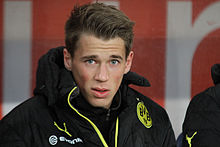

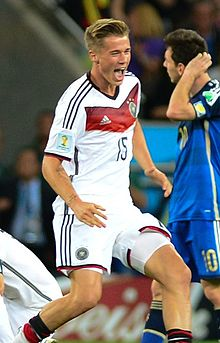

In [51]:
#we can pinpoint a specific image and get their attributes
img1 = images[0]
print(img1.attrs)
#then we can display the image with the source or 'SRC'
display(Image(img1['src']))
#better yet, we can do it in one go
display(Image(images[1]['src']))

In [3]:
soup = bs4.BeautifulSoup(open("/home/staff/jmoreira/Desktop/The HEXACO Personality Inventory - Revised.html"))

NameError: name 'bs4' is not defined

In [4]:
table = soup.find(id="results_facet_table")

In [78]:
for tag in table.find_all("tr"):
    cells = tag.find_all("td")
    if len(cells) == 2:
        # Getting the personality factor
        if cells[0].b:
            factor = cells[0].b.text
        else:
            factor = cells[0].contents[0].strip()
        
        # Getting the factor scores
        # This find_all gets all the <div> tags that have the attribute `data-original-title`
        # which is where the scores are actually stored
        divs = cells[1].div.find_all("div", attrs={"data-original-title": True})
        
        if divs:
            # First element is the user score
            own_score = float(divs[0]["data-original-title"].split(":")[1].strip())
            
            # Next element is the median score
            med_score = float(divs[1]["data-original-title"].split(":")[1].strip())
            
            # The final element is the 10th and 90th percentiles
            percents = divs[2]["data-original-title"].split("<br />")
            p10 = float(percents[0].split(":")[1].strip())
            p90 = float(percents[1].split(":")[1].strip())
            
            print(factor, own_score, med_score, p10, p90)

Honesty-Humility 3.5 3.22 2.41 3.97
Sincerity 3.0 3.25 2.13 4.25
Fairness 3.5 3.38 2.13 4.63
Greed-Avoidance 3.75 2.63 1.38 4.0
Modesty 3.75 3.63 2.5 4.5
Emotionality 3.69 3.34 2.63 3.97
Fearfulness 3.25 3.0 1.88 4.0
Anxiety 4.5 3.75 2.63 4.63
Dependence 3.5 3.25 2.0 4.25
Sentimentality 3.5 3.5 2.38 4.38
eXtraversion 2.31 3.5 2.72 4.22
Social Self-Esteem 3.25 4.0 3.0 4.63
Social Boldness 2.0 3.13 1.88 4.25
Sociability 1.5 3.63 2.5 4.5
Liveliness 2.5 3.63 2.5 4.5
Agreeableness 3.63 3.0 2.22 3.72
Forgivingness 3.5 2.75 1.75 3.88
Gentleness 3.5 3.25 2.25 4.13
Flexibility 3.5 2.75 1.75 3.75
Patience 4.0 3.25 2.0 4.38
Conscientiousness 3.75 3.47 2.72 4.16
Organization 4.5 3.38 2.13 4.38
Diligence 3.75 3.88 2.88 4.71
Perfectionism 3.25 3.63 2.38 4.38
Prudence 3.5 3.25 2.13 4.0
Openness to Experience 2.81 3.31 2.5 4.13
Aesthetic Appreciation 2.25 3.25 2.0 4.38
Inquisitiveness 3.5 3.13 1.88 4.38
Creativity 2.75 3.63 2.25 4.63
Unconventionality 2.75 3.38 2.63 4.25
Altruism 3.5 3.88 3.0 4.63


### Selecting the text from the Bootcamp's front page

In [7]:
response = requests.get("http://bootcamp-form.herokuapp.com/")

# First we turn the document into a "soup"
soup = bs4.BeautifulSoup(response.text)

# The text from the front page is declared as headers of different levels
bootcamp_text = soup.find_all("h1")        # finds all <h1> tags in the document

# Remaining pieces of text
bootcamp_text.extend( soup.find_all("h3") )
bootcamp_text.extend( soup.find_all("h4") )

for header in bootcamp_text:
    print(header.text)

httpbin(1): HTTP Request & Response Service
$ curl http://httpbin.org/ip
$ curl http://httpbin.org/user-agent
$ curl http://httpbin.org/get
$ curl -I http://httpbin.org/status/418
$ curl https://httpbin.org/get?show_env=1


In [8]:
# Beautiful Soup converts HTML tags into its own "Tag" objects
print(type(bootcamp_text[0]))

<class 'bs4.element.Tag'>


In [9]:
# These objects have several useful attributes
print(bootcamp_text[0].text)
print(bootcamp_text[0].name)

httpbin(1): HTTP Request & Response Service
h1


### Selecting the logos from the Bootcamp's front page

In [10]:
logos = soup.find_all("img")
print(logos)

[<img alt="Fork me on GitHub" src="https://s3.amazonaws.com/github/ribbons/forkme_right_darkblue_121621.png" style="position: absolute; top: 0; right: 0; border: 0;"/>]


In [11]:
# The html tag's attributes are also stored
print(logos[0].attrs)
print(logos[0]["class"])
print(logos[0]["src"])

{'style': 'position: absolute; top: 0; right: 0; border: 0;', 'src': 'https://s3.amazonaws.com/github/ribbons/forkme_right_darkblue_121621.png', 'alt': 'Fork me on GitHub'}


KeyError: 'class'

In [11]:
# You can also use Beautiful Soup to find one specific element
# You can also specify attributes to make the search more precise
nico_logo = soup.find("img", class_="nico_logo")
print(nico_logo)

# Or equivalently
# print(soup.find("img", alt="NICO"))
# print(soup.find("img", src="nico_logo.gif"))

# The "src" attribute represents a relative path of the image from the current URL
# To get the actual image we must prepend the web page's URL
display( Image(url=response.url + "/" + nico_logo["src"]) )

<img alt="NICO" class="nico_logo" src="nico_logo.gif"/>


### Selecting elements by their position in a web document (or page)

In [ ]:
# let's look at the Bootcamp page again
print(soup.prettify())     # prettify() adds indentation to the HTML

Notice how the images are nested inside `<a>` tags which in turn are nested inside `<li>` tags, nested inside `<ul>`:

```html
<ul class="nav navbar-nav navbar-right">
  <li class="active">
    <a class="menu-button" href="http://amaral-lab.org/">
      <img alt="Amaral Lab" class="amaral_logo" src="amaral-logo-white.png" style="height:30px"/>
        Amaral Lab
    </a>
  </li>
  <li class="active">
    <a class="menu-button" href="http://www.nico.northwestern.edu/index.html">
      <img alt="NICO" class="nico_logo" src="nico_logo.gif"/>
    </a>
  </li>
</ul>
```

In [ ]:
amaral_logo = soup.find("img", class_="amaral_logo")

# You can navigate from one Tag to any of its relatives
print(amaral_logo.parent.prettify())

print()

print(amaral_logo.parent.parent.parent.prettify())

In [ ]:
# You can even navigate using tag names
amaral_logo.parent.parent.parent.li.next_sibling

In [ ]:
# You can even navigate using tag names
nico_li = amaral_logo.parent.parent.parent.li.next_sibling.next_sibling

print(nico_li.prettify())

Now we can finally extract the other logo

In [ ]:
nico_logo = nico_li.a.img

display(Image(url=response.url + "/" + nico_logo["src"]))

## Scraping Exercises

## Soccer Premier League [scores](http://en.wikipedia.org/wiki/1992%E2%80%9393_FA_Premier_League#League_table)

Write a function `get_league_table` that returns the html `<table>...</table>` element with the final league scores for a given year. Then use the provided `html_table_to_df` to convert the table to a pandas DataFrame.

In [ ]:
def html_table_to_list(html_table):
    """
    Takes an html <table>...</table> BeautifulSoup element
    and converts it to an equivalent python list.
    """
    table_rows = html_table.find_all("tr")
    
    # If the html table has headers then we store this 
    # fact to properly add the DataFrame labels
    has_headers = bool(table_rows[0].find_all("th"))
    
    table_list = []
    for row in table_rows:
        table_list.append(
            # Because table cells can have other tags inside them,
            # it is easier to get all the text inside the row
            # and manually remove any newline characters.
            # Note that the newlines are from the html code itself.
            
            # "\xa0" is a whitespace character in the Latin-1 encoding
            # which Beautiful Soup encodes incorrectly using utf-8
            row.text.replace("\xa0", " ").strip("\n").split("\n")
        )
    
    return table_list

In [ ]:
def get_league_table(url):
    """
    Searchers `url` for the html table with the league results
    and returns it as a Beautiful Soup Tag object
    """
    # Get the text from the url

    # Turn it into a "soup"

    
    # Hint: Check the source code from wikipedia.
    # Does the league scores element have any
    # attributes we can use to find it?
    # What about the parent of the league scores element??
    
    
    

In [ ]:
# Test your code here

# 1992 Premier league scores
root_url = "http://en.wikipedia.org/wiki/1992%E2%80%9393_FA_Premier_League"

html_table = get_league_table(root_url)
html_table_to_df(html_table)


## Scraping song lyrics from [AZLyrics](http://www.azlyrics.com)

Create a function `get_song_lyrics` that scrape the lyrics of a song from its page, given the song's url.
You can use the provided `get_artist_songs` to get a list of song lyrics and to get inspiration for how to write your scraper.

In [ ]:
root_url = "http://www.azlyrics.com"

def get_artist_songs(artist_name):
    """
    Given an artist's name, crawls AZLyrics.com for that artist's songs.
    Returns a list of links to each song's lyrics' page.
    """
    # This line removes any strange characters (e.g. @#$%^&*, etc)
    # and white spaces from the artist's name and converts it to
    # lower case
    artist_name = re.sub("[\s\W]+", "", artist_name).lower()
    
    # artist page url is of the form:
    # http://www.azlyrics.com/[Artist Initial]/[Artist Name].html
    artist_url = "/" + artist_name[0] + "/" + artist_name + ".html"
    
    response = requests.get(root_url + artist_url)
    soup = bs4.BeautifulSoup(response.text)
    
    songs = []
    song_elements = soup.find("div", id="listAlbum")
    for song_link in song_elements.find_all("a", target="_blank"):
        songs.append(song_link.attrs.get("href")[3:])
    
    return(songs)


def get_song_lyrics(song_url):
    """
    Given a song's url, crawl's AZLyrics for that song's lyric
    and returns it as a tuple of strings:
    (song title, song lyrics)
    """
    pass

In [ ]:
# Test your code here

# Pick an artist
artist_name = ""
artist_songs = get_artist_songs(artist_name)

#lyrics = get_song_lyrics(artist_songs[])

# print(artist_name + "\n")
# print(lyrics[0])
# print("="*len(lyrics[0]))
# print(lyrics[1])